In [17]:
import re
from pathlib import Path

path_log="/home/avila/pangeblocks/output/logs/Cluster_6892-rule-pangeblock.err.log"

def time_from_log(path_log):
    with open(path_log, "r") as fp:
        lines=fp.readlines()

    # pattern 
    pattern_secs = r'\d+\.\d+'
    sys_time=None
    user_time=None
    for line in lines:
        if "User time (seconds)" in line:
            res = re.search(pattern_secs, line)
            user_time = float(res.group(0))
        elif "System time (seconds)" in line:
            res = re.search(pattern_secs, line)
            sys_time = float(res.group(0))

    name_msa, _, rule = Path(path_log).stem.split("-")
    # user_time, sys_time, name_msa, Path(rule).stem 

    return dict(
        name_msa=name_msa, 
        rule=Path(rule).stem ,
        sys_time=sys_time if sys_time else None,
        user_time=user_time if user_time else None,
    )

In [32]:
from collections import defaultdict
info_logs=defaultdict(dict)
logs = Path("../output/logs").rglob("*.err.log")
for log in logs:
    name_msa, rule, sys_time, user_time= time_from_log(log).values()
    info_logs[name_msa].update({rule:sys_time})

defaultdict(dict,
            {'Cluster_12313': {'analyze_blocks': 0.05,
              'postprocessing_gfa': 0.02,
              'pangeblock': 0.08,
              'compute_blocks': 0.04,
              'decompose_blocks': 0.09,
              'coverage': 0.06},
             'GC00007084': {'analyze_blocks': 0.08,
              'pangeblock': 0.07,
              'coverage': 0.04,
              'decompose_blocks': 0.09,
              'postprocessing_gfa': 0.02,
              'compute_blocks': 0.05},
             'GC00004574': {'decompose_blocks': 0.07,
              'pangeblock': 0.3,
              'analyze_blocks': 0.07,
              'coverage': 0.06,
              'compute_blocks': 0.05,
              'postprocessing_gfa': 0.01},
             'toyexample': {'compute_blocks': 0.06,
              'pangeblock': 0.09,
              'decompose_blocks': 0.06,
              'analyze_blocks': 0.06,
              'postprocessing_gfa': 0.01,
              'coverage': 0.08},
             'Cluster_74

In [42]:
import pandas as pd
times_df = pd.DataFrame.from_dict(info_logs).T
norm_times_df=times_df.div(times_df.sum(axis=1),axis=0)

<AxesSubplot: >

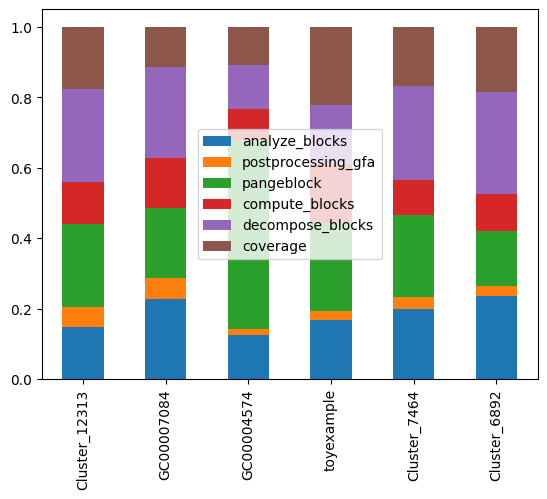

In [43]:
norm_times_df.plot(kind="bar", stacked=True)